# Finance Analysis
Reads a finance XLS and lumps up certain positions to categories / time intervals

**Reference**

In [15]:
import os
from machine_learning import finance_analysis

In [14]:
# get the path to the sample file
filename = "SampleData.csv"
filepath = os.path.join(os.getcwd(),"sample",filename)
print(f"Filepath {filepath} is path: {os.path.isfile(filepath)}")

Filepath C:\30_Entwicklung\WORK_JUPYTER\root\machine_learning\sample\SampleData.csv is path: True


In [32]:
# copy the descriptor
descriptor = finance_analysis.DATA_DESCRIPTOR.copy()
descriptor["FILE_NAME"] = filepath

In [33]:
# descriptor has the following keys
descriptor.keys()

dict_keys(['FILE_NAME', 'DATE_COLUMNS', 'N_HEADER_LINES', 'N_SKIP_ROWS', 'DATE_COL_ORIGINAL', 'DATE_COL', 'DEBIT_COL', 'CREDIT_COL', 'BALANCE_COL', 'TEXT_COL', 'TIME_BUCKET', 'DROP_COLS', 'DRAW_CATEGORIES', 'CATEGORY_DICT', 'FONTSIZE', 'TITLE', 'X_TITLE', 'Y_TITLE', 'FIGSIZE', 'THOUSAND_SEP', 'DECIMAL_SEP', 'DATA_SEP', 'CMAP_PALETTE'])

In [26]:
# analyze texts for keywords
finance_analysis.category_dict

{'CAT': ['Store1', 'Store2', 'Store3']}

In [22]:
# read the csv into dataframe 
df = finance_analysis.get_df_from_csv(descriptor)
df.head()

,Nr.,Umsatzart,Umsatzinformation,JJJJ,JJJJMM,JJJJWW,Betrag_EUR,Store1,Store2,Store3,CAT
Datum,,,,,,,,,,,
2021-10-09,1,Prepaid Kartenumsatz,Store2 KARTENUMSATZ AccounNo 09.09.2021,2021,202110,202140,-20.00,0.00,20.0,0.0,20.00
2021-08-09,2,Prepaid Kartenumsatz,Store1 14233 SOT City2 DE AccounNo 07.09....,2021,202108,202132,-11.48,11.48,0.0,0.0,11.48
2021-01-06,3,Gutschrift Prepaid Card Konto,GUTSCHRIFT PREPAID CARD KONTO 01.09.2021 ...,2021,202101,202101,12.00,-0.00,-0.0,-0.0,0.00
2021-01-05,4,Prepaid Kartenumsatz,Store2 KARTENUMSATZ AccounNo 31.08.2021,2021,202101,202101,-2.00,0.00,2.0,0.0,2.00
2021-01-09,5,Prepaid Kartenumsatz,Store3 KARTENUMSATZ AccounNo 31.08.2021,2021,202101,202101,-7.00,0.00,0.0,7.0,7.00


In [27]:
# get lump sums according to vocabulary dictionary
df_period = finance_analysis.get_df_by_period(df,descriptor)
df_period.head()

,Nr.,Betrag_EUR,Store1,Store2,Store3,CAT,JJJJ,JJJJMM
Datum,,,,,,,,
2020-11-01,14,1.00,0.00,0.00,-1.0,-1.00,2020,202011
2020-12-01,0,0.00,0.00,0.00,0.0,0.00,2020,202012
2021-01-01,12,3.00,0.00,2.00,7.0,9.00,2021,202101
2021-02-01,6,-6.27,0.00,6.27,0.0,6.27,2021,202102
2021-03-01,9,-7.99,7.99,0.00,0.0,7.99,2021,202103


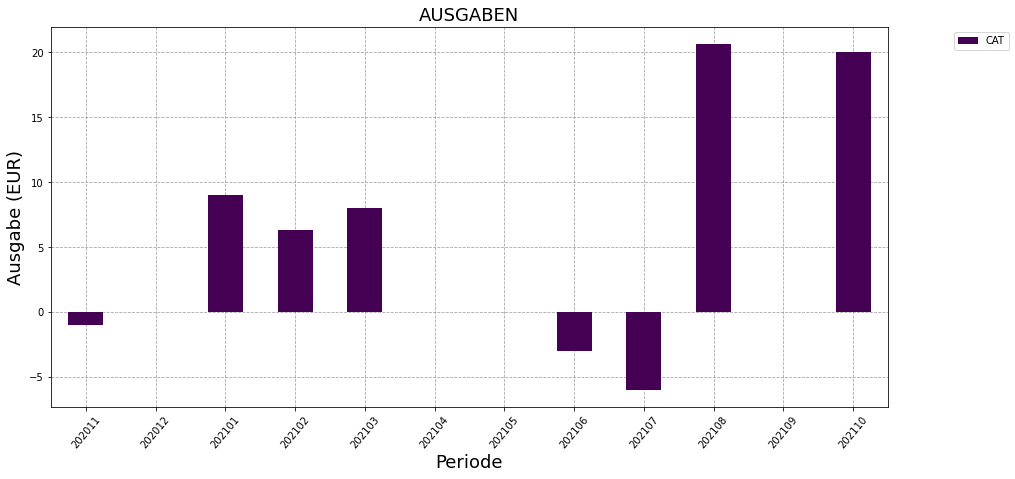

In [34]:
# show the graphics by categories
descriptor["DRAW_CATEGORIES"] = True
finance_analysis.draw_bars(df_period,descriptor);

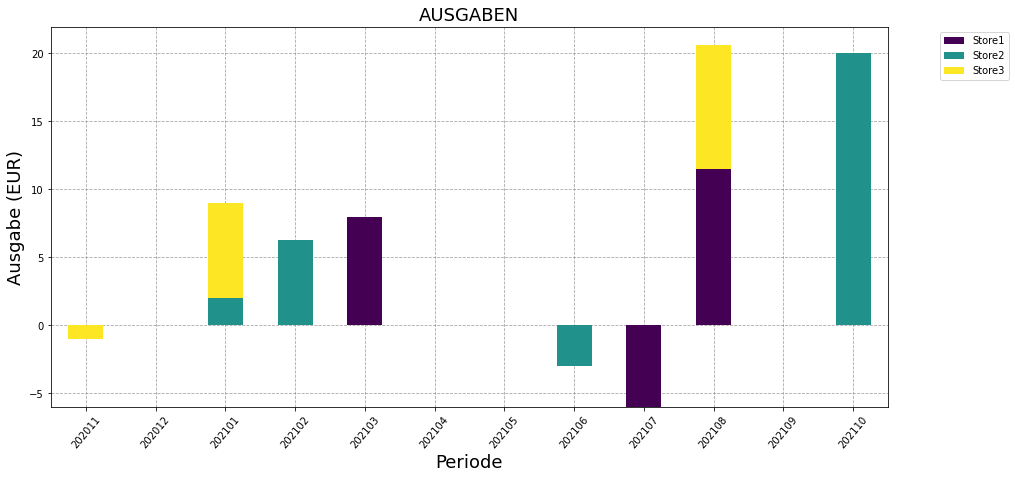

In [35]:
# show the graphics by vocabulary
descriptor["DRAW_CATEGORIES"] = False
finance_analysis.draw_bars(df_period,descriptor);